# PCA on a single image

Given an N-by-d gray scale image. Each pixel is represented by a number between 0 and 255, which represents the intensity of the pixel. We can treat the image as a N-by-d design matrix, where N is the number of pixels and d is the number of features.
What happens if we apply PCA to the image?

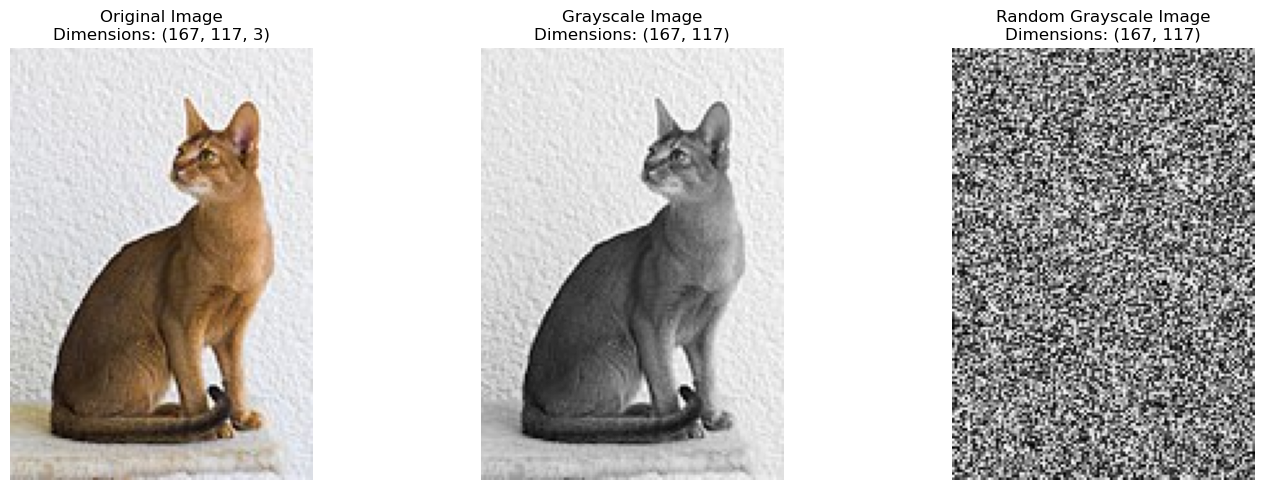

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Read the image, convert it to grayscale, and convert it to a NumPy array
image = Image.open('cat_wiki.jpg')
gray_image = image.convert('L')

image = np.array(image)
gray_image = np.array(gray_image)

# Display original image and grayscale image with their dimensions
# Original image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title(f'Original Image\nDimensions: {image.shape}')
axes[0].axis('off')

# Grayscale image
axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title(f'Grayscale Image\nDimensions: {gray_image.shape}')
axes[1].axis('off')

# Random grayscale image
random_gray_image = np.random.uniform(0, 255, gray_image.shape).astype(np.uint8)
axes[2].imshow(random_gray_image, cmap='gray')
axes[2].set_title(f'Random Grayscale Image\nDimensions: {random_gray_image.shape}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

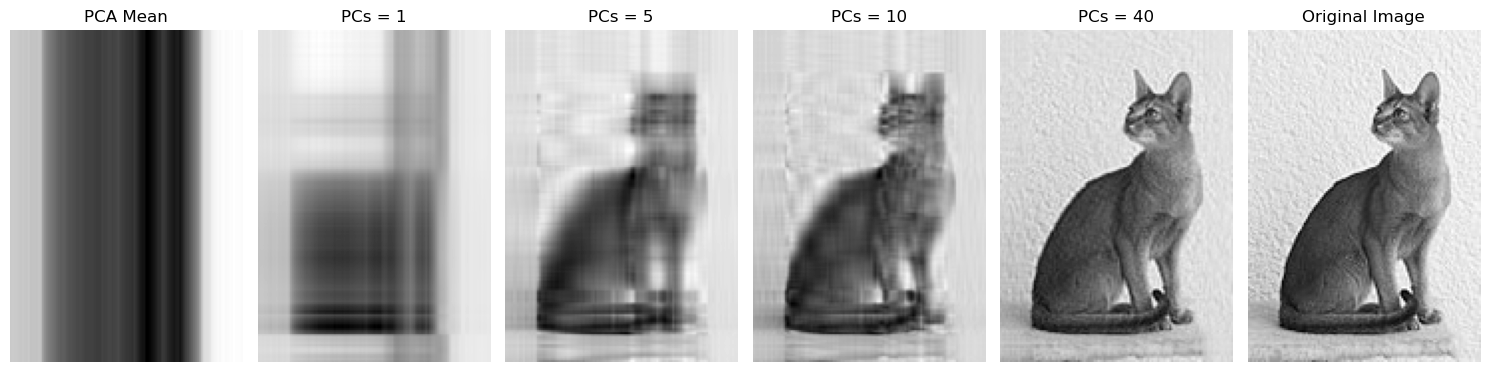

In [38]:

# Reconstruct the image with different numbers of principal components
components_to_try = [1, 5, 10, 40]
fig, axes = plt.subplots(1, len(components_to_try)+2, figsize=(15, 5))

for i, num_components in enumerate(components_to_try):
    pca = PCA(n_components=num_components)
    transformed_data = pca.fit_transform(gray_image)
    reconstructed_data = pca.inverse_transform(transformed_data)

    if i == 0:
        # PCA Mean image by duplicating the mean vector
        mean_image = np.tile(pca.mean_, (gray_image.shape[0], 1))
        axes[0].imshow(mean_image,cmap='gray')
        axes[0].set_title('PCA Mean')
        axes[0].axis('off')


    axes[i+1].imshow(reconstructed_data, cmap='gray')
    axes[i+1].set_title(f'PCs = {num_components}')
    axes[i+1].axis('off')

# Original image
axes[-1].imshow(gray_image, cmap='gray')
axes[-1].set_title('Original Image')
axes[-1].axis('off')

plt.tight_layout()
plt.show()


- Image has different parts: background, objects, edges, textures, etc.
- If a pixel belongs to the background (wall, sky, etc.), it's neibhboring pixels are likely to have similar intensities (there is spatial correlation)
- The "intrinstic" dimensionality of a image can be smaller than the number of pixels. In the above example, we need around 10 principle components to tell it's a cat, the rest are just details.